<a href="https://colab.research.google.com/github/gauravvojha/Cognifyz_DataScience_tasks/blob/main/task2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset

In [2]:
df = pd.read_csv('/content/restaurant_data.csv')

#Data Cleaning

In [3]:
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

#Table Booking and Online Delivery

In [4]:
table_booking_percentage = df['Has Table booking'].value_counts(normalize=True) * 100
print("Percentage of restaurants offering table booking:")
print(table_booking_percentage)

Percentage of restaurants offering table booking:
Has Table booking
No     85.827664
Yes    14.172336
Name: proportion, dtype: float64


# Calculate the percentage of restaurants that offer online delivery

In [5]:
online_delivery_percentage = df['Has Online delivery'].value_counts(normalize=True) * 100
print("Percentage of restaurants offering online delivery:")
print(online_delivery_percentage)

Percentage of restaurants offering online delivery:
Has Online delivery
No     73.628118
Yes    26.371882
Name: proportion, dtype: float64


#Compare Average Ratings

In [7]:
avg_rating_with_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()
print(f"Average rating with table booking: {avg_rating_with_booking}")
print(f"Average rating without table booking: {avg_rating_without_booking}")


Average rating with table booking: 3.5512
Average rating without table booking: 2.8849405548216644


#Analyze Online Delivery Availability

In [8]:
online_delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100
print("Online delivery availability by price range:")
print(online_delivery_by_price)

Online delivery availability by price range:
Has Online delivery         No        Yes
Price range                              
1.0                  82.558140  17.441860
2.0                  61.671088  38.328912
3.0                  71.379310  28.620690
4.0                  88.461538  11.538462


# Visualization

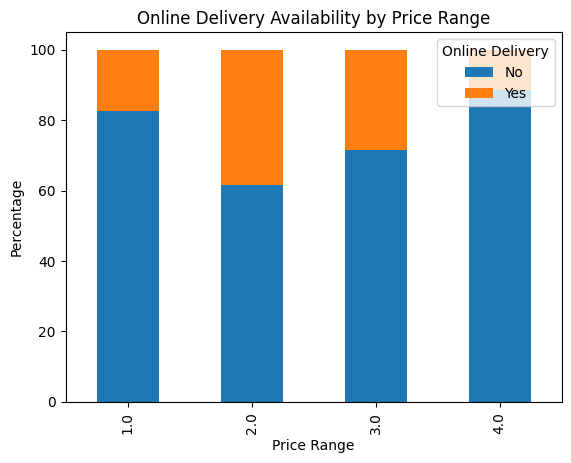

In [9]:
online_delivery_by_price.plot(kind='bar', stacked=True)
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.legend(title='Online Delivery', loc='upper right')
plt.show()

# Plot the comparison of average ratings

In [10]:
vg_ratings = pd.DataFrame({
    'Table Booking': ['Yes', 'No'],
    'Average Rating': [avg_rating_with_booking, avg_rating_without_booking]
})

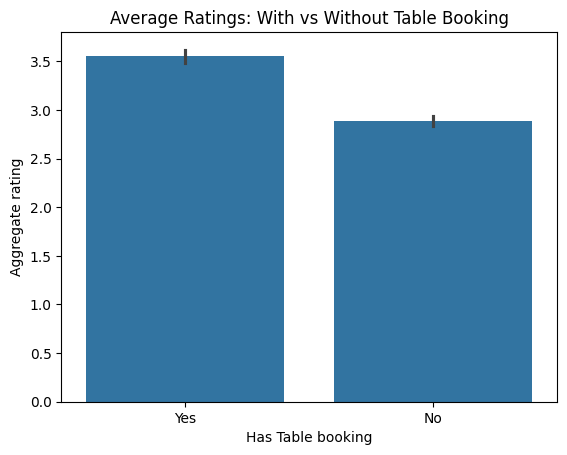

In [16]:
sns.barplot(x='Has Table booking', y='Aggregate rating', data=df)
plt.title('Average Ratings: With vs Without Table Booking')
plt.show()